In [1]:
import os
import pandas as pd

import matplotlib.pyplot as plt

from graphs import load_dataset_to_graph
from recreate_graph import get_trained_model, recreate_by_priority_rank
from measurements import get_graph_measurements, compare_graph_measurements, print_comparison_results

Using TensorFlow backend.



Processing highschool_2011
Epoch 1/4
15876/15876 [==============================] - 0s 26us/step - loss: 0.0767 - acc: 0.7832
Epoch 2/4
15876/15876 [==============================] - 0s 24us/step - loss: 0.0103 - acc: 0.7846
Epoch 3/4
15876/15876 [==============================] - 0s 22us/step - loss: 0.0045 - acc: 0.7846
Epoch 4/4
15876/15876 [==============================] - 0s 25us/step
loss: 0.0024753685925192484, accuracy: 0.7846434870244394


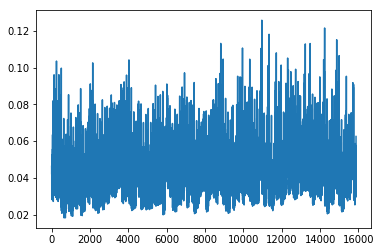

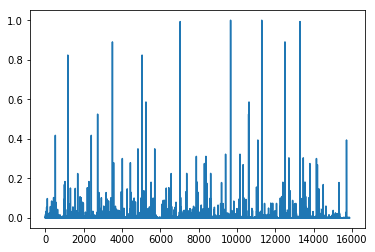

0
1


/home/smoq/.virtualenvs/cna/lib/python3.5/site-packages/networkx/algorithms/assortativity/correlation.py:287: RuntimeWarning: divide by zero encountered in double_scalars
  return (xy*(M-ab)).sum()/numpy.sqrt(vara*varb)


2
3
4
5
6
7
8
9


In [2]:
prepared_datasets_path = 'prepared_datasets'
prepared_dataframes_path = 'prepared_dataframes'
delimiter = '\t'

prepared_dataset_names = [
    #'primary_school', 'workplace', 
    'highschool_2011', #'highschool_2012', 'hospital', 
    #'moreno_blogs', 'moreno_sheep', 'moreno_seventh'
]
prepare_big_dataset_names = [
    'petster-hamster', 'email-Eu'
]
comparison_list = []
for dataset_name in prepared_dataset_names:
    print('\nProcessing {}'.format(dataset_name))
    dataset_path = os.path.join(prepared_datasets_path, dataset_name)
    dataframe_path = os.path.join(prepared_dataframes_path, dataset_name)
    
    graph = load_dataset_to_graph(dataset_path, node_limit=500)
    
    graph_real_attrs_dataframe_path = os.path.join(dataframe_path, 'graph_real_attrs.csv')
    df = pd.read_csv(graph_real_attrs_dataframe_path, delimiter=delimiter)
    
    model = get_trained_model(df, epochs=4)
    # drop target column
    X_test = df.drop(['num_of_edges'], axis=1)
    # predict num_edges
    y_pred = model.predict(X_test)
    # show predictions and real target values
    plt.figure(1)
    plt.plot(y_pred)
    plt.figure(2)
    plt.plot(df[['num_of_edges']])
    plt.show()
    for i in range(10):
        print(i)
        new_graph = recreate_by_priority_rank(graph, y_pred)

        graph_measurements = get_graph_measurements(graph)
        new_graph_measurements = get_graph_measurements(new_graph)
        comparison = compare_graph_measurements(graph_measurements, new_graph_measurements)
        comparison_list.append(comparison)
    #print_comparison_results(comparison)
    

In [8]:
# calculate average of comparisons
avg_dict = comparison_list[0].copy()

for comparison in comparison_list[1:]:
    for key in avg_dict:
        avg_dict[key] += comparison[key]
        
for key in avg_dict:
    avg_dict[key] /= len(comparison_list)

In [10]:
print_comparison_results(avg_dict)

(KS test p-value)  degree_centrality: 0.0017013869097141914           [passed: False]
(KS test p-value)  closeness_centrality: 0.0009537207483918478        [passed: False]
(KS test p-value)  betweenness_centrality: 6.636566224570424e-05      [passed: False]
(KS test p-value)  pagerank: 1.4431958533348463e-05                   [passed: False]
(abs distance)     average_shortest_path_length: 0.06379962192816636  [passed: True]
(abs distance)     diameter: 0.25                                     [passed: False]
(abs distance)     degree_centralization: 0.5347400826988377          [passed: False]
(abs distance)     closeness_centralization: 0.5420648773071528       [passed: False]
(abs distance)     betweenness_centralization: 0.03288798712979958    [passed: True]
(abs distance)     pagerank_centralization: 0.5596646464428143        [passed: False]
(abs distance)     density: 0.004972214097689334                      [passed: True]
(abs distance)     degree_assortativity: inf             